# Get data


In [55]:
import os 
import pathlib

dir= "data"

if not os.path.exists(dir):
    print("directory does not exist")
else:
    print("directory exists")
    path = pathlib.Path(dir)
    files = path.iterdir()
    for file in files:
        print(file.name)

directory exists
afd.csv
linke.csv
bsw.csv
spd.csv
sswb.csv
fdp.csv
gruene.csv
aggregated
cdu.csv
all_parties.csv
annotated_data


In [1]:
domain_mapping = {
    # Domain 1: External Relations
    '101': "Foreign Special Relationships: Positive",
    '102': "Foreign Special Relationships: Negative", 
    '103': "Anti-Imperialism: Positive",
    "103.1": "State Centred Anti-Imperialism",
    "103.2": "Foreign Financial Influence",
    '104': "Military: Positive",
    '105': "Military: Negative",
    '106': "Peace: Positive",
    '107': "Internationalism: Positive",
    '108': "European/Regional Integration: Positive",
    '109': "Internationalism: Negative",
    '110': "European/Regional Integration: Negative",
    
    # Domain 2: Freedom and Democracy
    '201': "Freedom and Human Rights: Positive",
    "201.1": "Freedom",
    "201.2": "Human Rights",
    '202': "Democracy",
    "202.1": "General: Positive",
    "202.2": "General: Negative",
    "202.3": "Representative Democracy: Positive",
    "202.4": "Direct Democracy: Positive",
    '203': "Constitutionalism: Positive",
    '204': "Constitutionalism: Negative",
    
    # Domain 3: Political System
    '301': "Decentralisation: Positive",
    '302': "Centralisation: Positive",
    '303': "Governmental and Administrative Efficiency: Positive",
    '304': "Political Corruption: Negative",
    '305': "Political Authority: Positive",
    "305.1": "Political Authority: Party Competence",
    "305.2": "Political Authority: Personal Competence",
    "305.3": "Political Authority: Strong government",
    "305.4": "Pre-Democratic Elites: Positive",
    "305.5": "Pre-Democratic Elites: Negative",
    "305.6": "Rehabilitation and Compensation",
    
    # Domain 4: Economy
    '401': "Free-Market Economy: Positive",
    '402': "Incentives: Positive",
    '403': "Market Regulation: Positive",
    '404': "Economic Planning: Positive",
    '405': "Corporatism: Positive",
    '406': "Protectionism: Positive",
    '407': "Protectionism: Negative",
    '408': "Economic Goals",
    '409': "Keynesian Demand Management: Positive",
    '410': "Economic Growth",
    '411': "Technology and Infrastructure: Positive",
    '412': "Controlled Economy: Positive",
    '413': "Nationalisation: Positive",
    '414': "Economic Orthodoxy: Positive",
    '415': "Marxist Analysis: Positive",
    '416': "Anti-Growth Economy: Positive",
    "416.1": "Anti-Growth Economy: Positive",
    "416.2": "Sustainability: Positive",
    
    # Domain 5: Welfare and Quality of Life
    '501': "Environmental Protection: Positive",
    '502': "Culture: Positive",
    '503': "Equality: Positive",
    '504': "Welfare State Expansion",
    '505': "Welfare State Limitation",
    '506': "Education Expansion",
    '507': "Education Limitation",
    
    # Domain 6: Fabric of Society
    '601': "National Way of Life: Positive",
    "601.1": "General",
    "601.2": "Immigration: Negative",
    '602': "National Way of Life: Negative",
    "602.1": "General",
    "602.2": "Immigration: Positive",
    '603': "Traditional Morality: Positive",
    '604': "Traditional Morality: Negative",
    '605': "Law and Order",
    "605.1": "Law and Order: Positive",
    "605.2": "Law and Order: Negative",
    '606': "Civic Mindedness: Positive",
    "606.1": "General",
    "606.2": "Bottom-Up Activism",
    '607': "Multiculturalism: Positive",
    "607.1": "General",
    "607.2": "Immigrant Integration: Diversity",
    "607.3": "Indigenous rights: Positive",
    '608': "Multiculturalism: Negative",
    "608.1": "General",
    "608.2": "Immigrant Integration: Assimilation",
    "608.3": "Indigenous rights: Negative",
    
    # Domain 7: Social Groups
    '701': "Labour Groups: Positive",
    '702': "Labour Groups: Negative",
    '703': "Agriculture and Farmers",
    "703.1": "Agriculture and Farmers: Positive",
    "703.2": "Agriculture and Farmers: Negative",
    '704': "Middle Class and Professional Groups: Positive",
    '705': "Minority Groups: Positive",
    '706': "Non-Economic Demographic Groups: Positive",
    
    # Special category
    '0': "No meaningful category applies"
}


# estimate costs 

In [2]:
import tiktoken
from pypdf import PdfReader

reader = PdfReader("codebook/handbook_2021_version_5.pdf")
full_text = []
for page in reader.pages:
    text = page.extract_text()
    full_text.append(text)

# Join all pages into a single string
full_text_string = '\n'.join(full_text)  # or use ' '.join(full_text)

encoding = tiktoken.get_encoding('cl100k_base')
token_count = len(encoding.encode(full_text_string))
print(f"handbook tokens: {token_count}")

reader = PdfReader("/Users/christophhau/Desktop/HA_ML/codebook/codebook_MPDataset_MPDS2025a.pdf")
full_text = []
for page in reader.pages:
    text = page.extract_text()
    full_text.append(text)

# Join all pages into a single string
full_text_string = '\n'.join(full_text)  # or use ' '.join(full_text)

token_count = len(encoding.encode(full_text_string))
print(f"codebook N-tokens: {token_count}")

print(f'Total tokens: {token_count +  token_count} tokens')



handbook tokens: 19733
codebook N-tokens: 12387
Total tokens: 24774 tokens


# inspect data set

In [3]:
import pandas as pd
import numpy as np

# Alle Partei-Files laden
parties = {
    'AfD': 'data/afd.csv',
    'Die Linke': 'data/linke.csv', 
    'BSW': 'data/bsw.csv',
    'SPD': 'data/spd.csv',
    'SSW': 'data/sswb.csv',  # Südschleswigscher Wählerverband
    'FDP': 'data/fdp.csv',
    'Grüne': 'data/gruene.csv',
    'CDU/CSU': 'data/cdu.csv'
}

all_data = []

print("Loading party manifestos...")
for party_name, filename in parties.items():
    try:
        df = pd.read_csv(filename)
        
        # Alle Sätze mit CMP-Code behalten (inkl. 'H')
        coded_df = df[df['cmp_code'].notna()].copy()
        coded_df['party'] = party_name
        
        all_data.append(coded_df)
        print(f"✓ {party_name}: {len(coded_df):,} coded sentences")
        
    except FileNotFoundError:
        print(f"✗ {party_name}: File {filename} not found")
    except Exception as e:
        print(f"✗ {party_name}: Error {e}")

# Alle Daten kombinieren
combined = pd.concat(all_data, ignore_index=True)
print(f"\n📊 Total: {len(combined):,} coded quasi-sentences")

# Grundlegende Datenexploration
print("\n" + "="*50)
print("DATA EXPLORATION")
print("="*50)

# 1. Spalten anzeigen
print(f"\n📋 Columns: {list(combined.columns)}")

# 2. Parteienverteilung
print(f"\n🏛️ Sentences per party:")
party_counts = combined.groupby('party').size().sort_values(ascending=False)
for party, count in party_counts.items():
    print(f"  {party}: {count:,}")

# 3. Top CMP Kategorien
print(f"\n📈 Top 15 CMP Categories:")
top_categories = combined['cmp_code'].value_counts().head(15)
for code, count in top_categories.items():
    if str(code).isdigit():
        print(f"  {int(code)}: {count:,} sentences")
    else:
        print(f"  {code}: {count:,} sentences (non-coded)")

# 4. Beispiel-Texte  
print(f"\n📝 Sample texts:")
# Nur numerische Codes für Beispiele
numeric_coded = combined[pd.to_numeric(combined['cmp_code'], errors='coerce').notna()]
if len(numeric_coded) > 0:
    sample = numeric_coded.sample(min(5, len(numeric_coded)))
    for idx, row in sample.iterrows():
        print(f"  [{int(float(row['cmp_code']))}] {row['party']}: {row['text'][:80]}...")
else:
    print("  No numeric codes found for sampling")

# 5. Textlängen
print(f"\n📏 Text length statistics:")
text_lengths = combined['text'].str.len()
print(f"  Mean: {text_lengths.mean():.1f} characters")
print(f"  Median: {text_lengths.median():.1f} characters")
print(f"  Min: {text_lengths.min()}")
print(f"  Max: {text_lengths.max()}")

# 6. Kategorien nach Domänen gruppieren (Codebook basiert)
## andere Zelle für leserlichkeit 
def get_domain(code):
    """Map CMP code to domain"""
    other_key= {}
    all_key= domain_mapping.keys()
    if code in all_key:
        return domain_mapping[code]
    else:
        return code

    
    
combined['domain'] = combined['cmp_code'].apply(get_domain)

print(f"\n🎯 Sentences per domain:")
domain_counts = combined.groupby('domain').size().sort_values(ascending=False)
for domain, count in domain_counts.items():
    print(f"  {domain}: {count:,}")

# Dataset für ML speichern
combined.to_csv('german_manifestos_combined.csv', index=False)
print(f"\n💾 Combined dataset saved as 'german_manifestos_combined.csv'")



Loading party manifestos...
✓ AfD: 2,067 coded sentences
✓ Die Linke: 2,366 coded sentences
✓ BSW: 1,351 coded sentences
✓ SPD: 2,105 coded sentences
✓ SSW: 2,268 coded sentences
✓ FDP: 1,554 coded sentences
✓ Grüne: 3,447 coded sentences
✓ CDU/CSU: 2,371 coded sentences

📊 Total: 17,529 coded quasi-sentences

DATA EXPLORATION

📋 Columns: ['text', 'text_en', 'cmp_code', 'eu_code', 'party']

🏛️ Sentences per party:
  Grüne: 3,447
  CDU/CSU: 2,371
  Die Linke: 2,366
  SSW: 2,268
  SPD: 2,105
  AfD: 2,067
  FDP: 1,554
  BSW: 1,351

📈 Top 15 CMP Categories:
  503: 1,579 sentences
  504: 1,532 sentences
  411: 1,434 sentences
  H: 796 sentences (non-coded)
  501: 788 sentences
  605.1: 764 sentences (non-coded)
  416.2: 722 sentences (non-coded)
  403: 721 sentences
  202.1: 686 sentences (non-coded)
  701: 632 sentences
  303: 552 sentences
  506: 449 sentences
  201.1: 418 sentences (non-coded)
  401: 399 sentences
  107: 377 sentences

📝 Sample texts:
  [411] CDU/CSU: Smarte Energie....


In [7]:
import pandas as pd

# Kreuztabelle erstellen: Häufigkeiten
freq_table = pd.crosstab(combined['cmp_code'], combined['party'])

# Gesamtsummen pro Zeile und Spalte hinzufügen
freq_table['Total'] = freq_table.sum(axis=1)
freq_table.loc['Total'] = freq_table.sum()

# Prozentwerte berechnen (optional, APA oft erwünscht)
percent_table = freq_table.div(freq_table.loc['Total', 'Total']).round(3) * 100

# APA-Tabelle zusammenbauen (Counts + %)
apa_table = freq_table.astype(str) + " (" + percent_table.round(1).astype(str) + "%)"

# Für bessere Lesbarkeit: Reset Index
apa_table = apa_table.reset_index().rename(columns={'cmp_code': 'CMP Code'})

# Tabelle als CSV oder Word ausgeben
apa_table.to_csv("apa_cmp_distribution.csv", index=False)
print("\n✅ APA-konforme Tabelle gespeichert: 'apa_cmp_distribution.csv'")

# Vorschau (nur Kopf)
print("\n📊 APA-style Frequency Table (first 10 rows):")
print(apa_table.head(10).to_string(index=False))

print("\n📊 Last row (Total):")
print(apa_table.tail(1).to_string(index=False))


✅ APA-konforme Tabelle gespeichert: 'apa_cmp_distribution.csv'

📊 APA-style Frequency Table (first 10 rows):
CMP Code       AfD       BSW    CDU/CSU Die Linke       FDP      Grüne       SPD       SSW      Total
     000  9 (0.1%)  2 (0.0%)   1 (0.0%)  0 (0.0%)  5 (0.0%)   2 (0.0%)  9 (0.1%)  8 (0.0%)  36 (0.2%)
     101  0 (0.0%)  1 (0.0%)  17 (0.1%)  1 (0.0%) 10 (0.1%)   5 (0.0%) 10 (0.1%)  6 (0.0%)  50 (0.3%)
     102  0 (0.0%)  3 (0.0%)   0 (0.0%)  0 (0.0%)  0 (0.0%)   0 (0.0%)  0 (0.0%)  0 (0.0%)   3 (0.0%)
   103.1  4 (0.0%)  4 (0.0%)   4 (0.0%) 16 (0.1%)  4 (0.0%)  15 (0.1%) 15 (0.1%) 10 (0.1%)  72 (0.4%)
   103.2  0 (0.0%)  0 (0.0%)   1 (0.0%)  0 (0.0%)  0 (0.0%)   0 (0.0%)  0 (0.0%)  0 (0.0%)   1 (0.0%)
     104 20 (0.1%)  2 (0.0%) 139 (0.8%)  2 (0.0%) 44 (0.3%)  67 (0.4%) 66 (0.4%) 20 (0.1%) 360 (2.1%)
     105  5 (0.0%) 90 (0.5%)   0 (0.0%) 68 (0.4%)  1 (0.0%)  21 (0.1%) 10 (0.1%)  0 (0.0%) 195 (1.1%)
     106 12 (0.1%) 35 (0.2%)  10 (0.1%) 44 (0.3%)  7 (0.0%)  43 (0.2%) 28 

✅ Kompakte Häufigkeitstabelle gespeichert: 'cmp_code_verteilung.csv'

📊 Verteilung der CMP Codes:
CMP Code  Häufigkeit  Anteil (%)
     503        1579         9.0
     504        1532         8.7
     411        1434         8.2
       H         796         4.5
     501         788         4.5
   605.1         764         4.4
   416.2         722         4.1
     403         721         4.1
   202.1         686         3.9
     701         632         3.6
     303         552         3.1
     506         449         2.6
   201.1         418         2.4
     401         399         2.3
     107         377         2.2
     104         360         2.1
     410         310         1.8
     402         304         1.7
   201.2         298         1.7
   703.1         289         1.6
     108         272         1.6
     502         270         1.5
   606.1         257         1.5
   601.2         242         1.4
     505         199         1.1
     603         195         1.1
     105   

/var/folders/y1/nwn64wsx1zdcpp75s80zznj00000gn/T/ipykernel_1657/4127169482.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


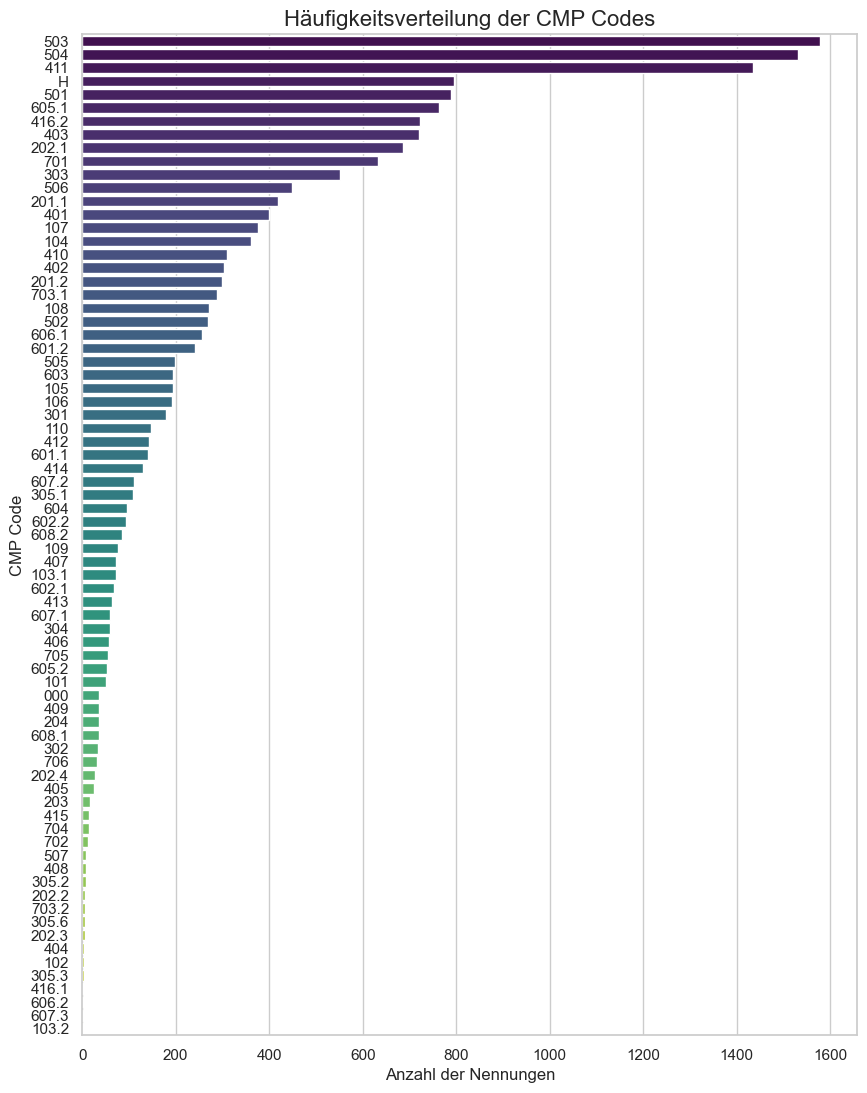

In [ ]:
# 1. Häufigkeiten der CMP Codes zählen
freq_dist = combined['cmp_code'].value_counts().reset_index()
freq_dist.columns = ['CMP Code', 'Häufigkeit']

# 2. Prozentualen Anteil berechnen
total_count = len(combined)
freq_dist['Anteil (%)'] = (freq_dist['Häufigkeit'] / total_count * 100).round(1)

# Optional: Nach CMP Code sortieren, falls gewünscht
# freq_dist = freq_dist.sort_values(by='CMP Code').reset_index(drop=True)

# Tabelle als CSV für Word speichern
freq_dist.to_csv("cmp_code_verteilung.csv", index=False)
print("✅ Kompakte Häufigkeitstabelle gespeichert: 'cmp_code_verteilung.csv'")

# Vorschau der finalen Tabelle
print("\n📊 Verteilung der CMP Codes:")
print(freq_dist.to_string(index=False))

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
# Etwas kleiner in der Höhe, da die Labels nun seitlich stehen
plt.figure(figsize=(10, 13)) 

# ✅ Wir wechseln zurück zu y='cmp_code'
ax = sns.countplot(
    y='cmp_code', 
    data=combined,
    order=combined['cmp_code'].value_counts().index,
    palette='viridis'
)

ax.set_title('Häufigkeitsverteilung der CMP Codes', fontsize=16)
# Achsenbeschriftungen ebenfalls tauschen
ax.set_xlabel('Anzahl der Nennungen', fontsize=12) 
ax.set_ylabel('CMP Code', fontsize=12)

# Die Rotation der Ticks wird nicht mehr benötigt!

plt.savefig('cmp_code_verteilung_horizontal.png', dpi=300, bbox_inches='tight')
plt.show()

In [21]:
#ist pareto

# 1. Häufigkeiten berechnen und sortieren (haben wir schon im DataFrame 'freq_dist')
# Falls nicht vorhanden, hier neu erstellen:
freq_dist = combined['cmp_code'].value_counts().reset_index()
freq_dist.columns = ['CMP Code', 'Häufigkeit']

# 2. Kumulative (aufsummierte) Werte berechnen
total_count = freq_dist['Häufigkeit'].sum()
freq_dist['Kumulierte Häufigkeit'] = freq_dist['Häufigkeit'].cumsum()
freq_dist['Kumulierter Anteil (%)'] = (freq_dist['Kumulierte Häufigkeit'] / total_count * 100).round(1)

# 3. Anteil der Kategorien berechnen
num_categories = len(freq_dist)
freq_dist['Anteil der Kategorien (%)'] = ((freq_dist.index + 1) / num_categories * 100).round(1)


# Spalten für die Analyse auswählen und anzeigen
pareto_analysis = freq_dist[['CMP Code', 'Häufigkeit', 'Anteil der Kategorien (%)', 'Kumulierter Anteil (%)']]
print("\n📊 Pareto-Analyse Tabelle:")
print(pareto_analysis.to_string(index=False))

pareto_analysis.to_excel('CumulativeDistributionofLabels.xlsx')


📊 Pareto-Analyse Tabelle:
CMP Code  Häufigkeit  Anteil der Kategorien (%)  Kumulierter Anteil (%)
     503        1579                        1.3                     9.0
     504        1532                        2.7                    17.7
     411        1434                        4.0                    25.9
       H         796                        5.3                    30.5
     501         788                        6.7                    35.0
   605.1         764                        8.0                    39.3
   416.2         722                        9.3                    43.4
     403         721                       10.7                    47.6
   202.1         686                       12.0                    51.5
     701         632                       13.3                    55.1
     303         552                       14.7                    58.2
     506         449                       16.0                    60.8
   201.1         418                 

Daten mit Rang und Häufigkeit (erste 5 Zeilen):
  CMP Code  Häufigkeit  Rang
0      503        1579     1
1      504        1532     2
2      411        1434     3
3        H         796     4
4      501         788     5


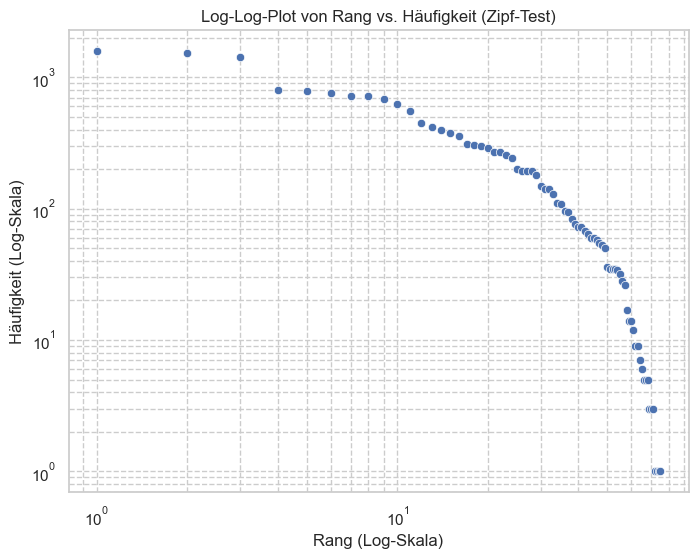


📈 Ergebnisse der linearen Regression:
Die Steigung der Linie ist: -1.7607
Der berechnete Zipf-Exponent (α) ist: 1.7607
Das Bestimmtheitsmaß (R²) ist: 0.7163


In [19]:
import pandas as pd

# Annahme: 'combined' ist dein ursprünglicher DataFrame
# 1. Häufigkeiten zählen (ist bereits nach Häufigkeit sortiert)
freq_dist = combined['cmp_code'].value_counts().reset_index()
freq_dist.columns = ['CMP Code', 'Häufigkeit']

# 2. Den Rang hinzufügen (der Rang ist einfach die Zeilennummer + 1)
freq_dist['Rang'] = freq_dist.index + 1

print("Daten mit Rang und Häufigkeit (erste 5 Zeilen):")
print(freq_dist.head())

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))

# Erstelle einen Scatterplot
sns.scatterplot(data=freq_dist, x='Rang', y='Häufigkeit')

# WICHTIG: Setze beide Achsen auf eine logarithmische Skala
plt.xscale('log')
plt.yscale('log')

# Titel und Beschriftungen
plt.title("Log-Log-Plot von Rang vs. Häufigkeit (Zipf-Test)")
plt.xlabel("Rang (Log-Skala)")
plt.ylabel("Häufigkeit (Log-Skala)")
plt.grid(True, which="both", ls="--") # Gitternetz hilft bei der Orientierung

plt.show()

import numpy as np
from scipy import stats

# Logarithmus von Rang und Häufigkeit berechnen
log_rang = np.log(freq_dist['Rang'])
log_häufigkeit = np.log(freq_dist['Häufigkeit'])

# Lineare Regression durchführen
slope, intercept, r_value, p_value, std_err = stats.linregress(log_rang, log_häufigkeit)

# Der Zipf-Exponent alpha ist der positive Wert der Steigung
alpha = -slope
r_squared = r_value**2

print(f"\n📈 Ergebnisse der linearen Regression:")
print(f"Die Steigung der Linie ist: {slope:.4f}")
print(f"Der berechnete Zipf-Exponent (α) ist: {alpha:.4f}")
print(f"Das Bestimmtheitsmaß (R²) ist: {r_squared:.4f}")

In [59]:
#KEIN stratified sampling, da Reihenfolge der Sätze relevant ist


# from sklearn.model_selection import train_test_split

# class_counts = combined['domain'].value_counts()

# classes_to_keep = class_counts[class_counts >= 2].index
# filtered_combined = combined[combined['domain'].isin(classes_to_keep)]

# print(f"Original size: {len(combined):,}. Filtered size: {len(filtered_combined):,}")

# dev_subset, _ = train_test_split(
#     filtered_combined, 
#     train_size=0.10,
#     stratify=filtered_combined['domain'], 
#     random_state=42,
# )

# print(f"📊 Development subset created with {len(dev_subset):,} sentences.")

# dev_subset.to_csv('data/german_manifestos_dev_subset.csv', index=False)
# print("💾 Development subset saved as 'german_manifestos_dev_subset.csv'")

for party_name, filename in parties.items():
    try:
        df = pd.read_csv(filename)
        
        # Alle Sätze mit CMP-Code behalten (inkl. 'H')
        coded_df = df[df['cmp_code'].notna()].copy()
        coded_df['party'] = party_name
        
        all_data.append(coded_df)
        print(f"✓ {party_name}: {len(coded_df):,} coded sentences")
        
    except FileNotFoundError:
        print(f"✗ {party_name}: File {filename} not found")
    except Exception as e:
        print(f"✗ {party_name}: Error {e}")

# Alle Daten kombinieren
combined = pd.concat(all_data, ignore_index=True)
print(f"\n📊 Total: {len(combined):,} coded quasi-sentences")

✓ AfD: 2,067 coded sentences
✓ Die Linke: 2,366 coded sentences
✓ BSW: 1,351 coded sentences
✓ SPD: 2,105 coded sentences
✓ SSW: 2,268 coded sentences
✓ FDP: 1,554 coded sentences
✓ Grüne: 3,447 coded sentences
✓ CDU/CSU: 2,371 coded sentences

📊 Total: 35,058 coded quasi-sentences


# Helper methods

In [33]:
import os
import pathlib
import json
import uuid
import time
from openai import OpenAI
from datetime import datetime
from prompt_template_improved import get_template

from dotenv import load_dotenv
load_dotenv()

# assuming openai client is set up:
client = OpenAI()

def cluster_headers(df):
    #df = pd.read_csv(csv)
    sections = []
    buffer = []
    current_header = []
    
    for _, row in df.iterrows():
        if row["cmp_code"] == "H":  
            # Sammle Überschrift(en)
            current_header.append(row["text_en"])
        else:
            # Falls wir gerade einen Header-Cluster abgeschlossen haben:
            if current_header:
                header = " – ".join(current_header)
                buffer = {"header": header, "content": []}
                sections.append(buffer)
                current_header = []
            # Text hinzufügen
            if sections:
                sections[-1]["content"].append(row["text_en"])
            else:
                # Edge-Case: Text vor erster Überschrift
                sections.append({"header": None, "content": [row["text_en"]]})
    
    return sections

#cluster_headers("data/afd.csv")

def prepare_call_for_party(category_scheme_template, paragraph):
    # create the classification prompt
    systemmessae = f"""Use the following category scheme to classify the sentence. Provide only the code and nothing else.
{category_scheme_template}"""
    
    newline = '\n'
    # Create all lines with numbers
    all_lines = [paragraph['header']] + paragraph['content']
    total_lines = len(all_lines)
    
    content = f"""CRITICAL FORMATTING REQUIREMENTS:
1. Always use the EXACT 3-digit format: 101, 402, 601, etc.
2. For subcategories, use format: 103.1, 103.2, 201.1, 201.2, etc.
3. NEVER use: single digits (1, 2, 7), letter prefixes (A1, EUS), or abbreviated codes
4. Valid codes ONLY from the provided scheme - verify each code exists before output
5. For "No meaningful category", use exactly: 000
6. Annotate each line indiviually and ONLY return the exact code from scheme
{newline.join([f"{i+1}. {item}" for i, item in enumerate(all_lines)])}"""
    
    return systemmessae, content, total_lines



def prepare_call_for_single_line(context, quasisentence, template):
    systemmessae = f"""Use the provided category scheme to classify the sentence. Provide only the code and nothing else."""
    newline = '\n'
    context_formatted =f'{newline}## Context (for reference, do not code this):<s>{context}</s>{newline}'
    quasisentence_formatted = f'Code the following: {quasisentence}'
    content_full= systemmessae + context_formatted + quasisentence_formatted

    systemmessae= get_template(template)

    return systemmessae, content_full  
    


def save_predictions(list_of_annotaions, df_results):
    try:
        total_n_lines = len(df_results)
        progress = df_results['annotations'].notna().sum()
        print(f"Progress: {progress}/{total_n_lines} lines annotated.")
        
        unannotated_indices = df_results[df_results['annotations'].isna()].index
        first_unannotated = unannotated_indices[0] if len(unannotated_indices) > 0 else None
        
        if first_unannotated is not None:
            end_idx = first_unannotated + len(list_of_annotaions)
            df_results.loc[first_unannotated:end_idx-1, 'annotations'] = [str(annotation) for annotation in list_of_annotaions]
            print(f"Saved {len(list_of_annotaions)} new annotations from row {first_unannotated} to {end_idx-1}")
        
        return True
    except Exception as e:
        print(f"Error saving annotations: {e}")
        return False
    


# load and eval 

def find_first_missing(df, column):
    for index, value in df[column].items():
        if pd.isna(value):
            return index
    return None

def get_results(df, target_column, prediction_column, matches):
    df[matches] = (df[target_column] == df[prediction_column]).astype(int)
    
    # Create summary table with totals and by category
    summary = df.groupby(target_column).agg({
        matches: ['sum', 'count', 'mean']
    }).round(3)
    
    # Flatten the multi-level columns
    summary.columns = ['Correct', 'Total', 'Accuracy']
    
    # Add overall totals
    total_correct = df[matches].sum()
    total_count = df[matches].count()
    total_accuracy = df[matches].mean()
    
    # Create total row as a DataFrame to match the structure
    total_row = pd.DataFrame({
        'Correct': [total_correct],
        'Total': [total_count], 
        'Accuracy': [round(total_accuracy, 3)]
    }, index=['Total'])
    
    # Combine results
    summary = pd.concat([summary, total_row])
    
    return summary

def load_results(results_dir):
    #check if directory exits if not create 
    os.makedirs(results_dir, exist_ok=True)

    for file in os.listdir(results_dir):
        if file.endswith(".csv"):
            df = pd.read_csv(os.path.join(results_dir, file))
            print('analyzing file ', file)
            first_missing = find_first_missing(df, 'annotations')
            if first_missing is not None:
                #print(f'##### Only Annotated until {first_missing}/{len(df)} #####')
                df = df[:first_missing]
            else:
                print("All lines annotated")
            print(get_results(df, 'cmp_code', 'annotations', 'matches'))

def create_crosstab_analysis(results_dir, output_file=None):
    """
    Creates a comprehensive crosstab analysis comparing actual annotations vs predictions
    across all parties and codes.
    
    Parameters:
    results_dir (str): Directory containing CSV files for each party
    output_file (str): Optional file path to save the results
    
    Returns:
    pd.DataFrame: Crosstab with parties as rows and code metrics as columns
    """
    
    # Dictionary to store results for each party
    party_results = {}
    all_codes = set()
    os.makedirs(results_dir, exist_ok=True)
    if not output_file:
        #Daytime ist als globale variable definiert !!!
        filename= f'{DAYTIME}kreuztabelle.csv'
        output_file=os.path.join(results_dir,filename)
    # Process each party file
    for file in os.listdir(results_dir):
        if file.endswith(".csv"):
            party_name = file.replace('.csv', '').replace('_', ' ').title()
            
            # Load and process data
            df = pd.read_csv(os.path.join(results_dir, file))
            print(f'Processing party: {party_name}')
            
            # Handle missing annotations
            first_missing = find_first_missing(df, 'annotations')
            if first_missing is not None:
                df = df[:first_missing]
                print(f'  - Annotated until row {first_missing}/{len(df) + first_missing}')
            else:
                print(f'  - All {len(df)} lines annotated')
            
            # Create matches column
            df['matches'] = (df['cmp_code'] == df['annotations']).astype(int)
            
            # Get all unique codes for this party
            party_codes = set(df['cmp_code'].unique()) | set(df['annotations'].unique())
            all_codes.update(party_codes)
            
            # Calculate metrics for each code
            code_metrics = {}
            
            for code in party_codes:
                # Actually annotated (ground truth)
                actually = len(df[df['cmp_code'] == code])
                
                # Predicted by algorithm
                predicted = len(df[df['annotations'] == code])
                
                # Correctly matched (both actual and predicted are the same)
                matched = len(df[(df['cmp_code'] == code) & (df['annotations'] == code)])
                
                code_metrics[code] = {
                    'actually': actually,
                    'predicted': predicted,
                    'matched': matched
                }
            
            party_results[party_name] = {
                'codes': code_metrics,
                'total_samples': len(df),
                'total_matches': df['matches'].sum(),
                'overall_accuracy': df['matches'].mean()
            }
    _all_codes=[]
    for c in all_codes:
        _all_codes.append(str(c))
    all_codes=_all_codes
    # Create the flat crosstab structure
    all_codes = sorted(list(all_codes))
    columns = []
    
    # Build column names for each code
    for code in all_codes:
        columns.extend([f'Code_{code}_Actually', f'Code_{code}_Predicted', f'Code_{code}_Matching'])
    
    # Add party totals
    columns.extend(['Party_Total_Actually', 'Party_Total_Predicted', 'Party_Total_Matching'])
    
    # Create DataFrame
    crosstab_data = []
    
    for party_name, results in party_results.items():
        row = []
        party_total_actually = 0
        party_total_predicted = 0
        party_total_matched = 0
        
        # Fill data for each code
        for code in all_codes:
            if code in results['codes']:
                actually = results['codes'][code]['actually']
                predicted = results['codes'][code]['predicted']
                matched = results['codes'][code]['matched']
            else:
                actually = predicted = matched = 0
            
            row.extend([actually, predicted, matched])
            party_total_actually += actually
            party_total_predicted += predicted
            party_total_matched += matched
        
        # Add party totals
        row.extend([party_total_actually, party_total_predicted, party_total_matched])
        crosstab_data.append(row)
    
    # Create DataFrame
    crosstab_df = pd.DataFrame(crosstab_data, columns=columns, index=list(party_results.keys()))
    
    # Add totals row
    totals_row = []
    for col in columns:
        totals_row.append(crosstab_df[col].sum())
    
    # Convert to DataFrame for the totals row
    totals_df = pd.DataFrame([totals_row], columns=columns, index=['Total'])
    
    # Combine main data with totals
    final_crosstab = pd.concat([crosstab_df, totals_df])
    final_crosstab.to_csv(output_file)
    return final_crosstab

In [ ]:



path = 'data/afd.csv'
instruction = 'llm_optimized_1'
DAYTIME = datetime.now().strftime("%Y%m%d_%H%M%S")

basepath= f"data/annotated_data/run_test_{instruction}_{DAYTIME}/"
results_file_path = f"{basepath}{'afd'}_annotated_{DAYTIME}.csv"

party_name = os.path.splitext(os.path.basename(path))[0]
results_file_path = f"{basepath}{party_name}_annotated_{DAYTIME}.csv"
os.makedirs(basepath, exist_ok=True)
path= 'data/contextaware_data_20250927_112401/afd_context_20250927_112401.csv'
#print(results_file_path)
df= pd.read_csv(path)
df['annotations'] = len(df)*[np.nan]
df['annotations'] = df['annotations'].astype('object')


results_file = df.to_csv(results_file_path, index=False)
#paragraph = cluster_headers(df=df)
for index, row in df.iterrows():
    quasisentence = row['text_en']
    context = row['context']
    systemmessae, content=prepare_call_for_single_line(context, quasisentence, template=instruction)
    print(content)

Use the provided category scheme to classify the sentence. Provide only the code and nothing else.
## Context (for reference, do not code this):<s>TIME FOR GERMANY.</s>
Code the following: TIME FOR GERMANY.
Use the provided category scheme to classify the sentence. Provide only the code and nothing else.
## Context (for reference, do not code this):<s>TIME FOR GERMANY. PROGRAM OF THE ALTERNATIVE FOR GERMANY FOR THE ELECTION TO THE 21ST GERMAN FEDERAL PARLIAMENT TIME FOR PROSPERITY SOCIAL MARKET ECONOMY AND HEALTH SOCIAL MARKET ECONOMY We are firmly committed to the principles of the social market economy, which have ensured prosperity and social peace in our country for decades.</s>
Code the following: PROGRAM OF THE ALTERNATIVE FOR GERMANY FOR THE ELECTION TO THE 21ST GERMAN FEDERAL PARLIAMENT
Use the provided category scheme to classify the sentence. Provide only the code and nothing else.
## Context (for reference, do not code this):<s>TIME FOR GERMANY. PROGRAM OF THE ALTERNATIVE FO

# Run 

In [78]:
from prompt_template import get_template
import openai
#DAYTIME = datetime.now().strftime("%Y%m%d_%H%M%S")
DAYTIME='20250926_103055' 
client = OpenAI()
# prompt template
instruction_templates = [
    # 'category_scheme',
    #           'coding_instruct',
    #           'Few_shot_instruct',
    #   #        'cot_instruct',
    #           'instruct_only',
              'cot_instruct']

#path_to_orginal_file = "data/afd.csv"
for instruction in instruction_templates:
    basepath= f"data/annotated_data/run_{instruction}_{DAYTIME}/"
    paths = ["data/afd.csv", "data/spd.csv", "data/cdu.csv", "data/fdp.csv", "data/gruene.csv", "data/linke.csv", "data/bsw.csv", "data/sswb.csv"]
    os.makedirs(basepath, exist_ok=True)


    for path in paths:
        # Extract just the filename without extension
        party_name = os.path.splitext(os.path.basename(path))[0]
        results_file_path = f"{basepath}{party_name}_annotated_{DAYTIME}.csv"
        #print(results_file_path)
        df= pd.read_csv(path)
        df['annotations'] = len(df)*[np.nan]
        df['annotations'] = df['annotations'].astype('object')

        results_file = df.to_csv(results_file_path, index=False)
        paragraph = cluster_headers(df=df)
        for p in paragraph:
            systemmessae, content, n_lines=prepare_call_for_party(instruction, paragraph=p)
            #print(content)
            try:
                request = client.chat.completions.create(
                    model="gpt-4.1-mini-2025-04-14",
                    messages=[
                        {"role": "system", "content": systemmessae},
                        {"role": "user", "content": content}
                    ],
                    temperature=0,
                )
                content = request.choices[0].message.content
                print(content[:55])
                
            except openai.APITimeoutError:  # Correct way to catch the error
                print('RETRYING due to timeout...')
                try:
                    request = client.chat.completions.create(
                        model="gpt-4.1-mini-2025-04-14",
                        messages=[
                            {"role": "system", "content": systemmessae},
                            {"role": "user", "content": content}
                        ],
                        temperature=0,
                    )
                    content = request.choices[0].message.content
                    print(content[:55])
                except Exception as e:
                    print(f"Retry failed: {e}")
                    raise
        
            except Exception as e:
                print(f"Other error occurred: {e}")
                raise
            list_of_annotaions= content.split('\n')
            if len(list_of_annotaions) == n_lines:
                print("all lines annotated")
                _saving=save_predictions(list_of_annotaions, df)
                if _saving:
                    df.to_csv(results_file_path, index=False)
                    print(f"Saved progress to {results_file_path}")
                else:
                    error_list = ["Error_saving_annotations"]*len(list_of_annotaions)
                    save_predictions(error_list, df)
                    print("Error saving annotations, saved error messages instead")
            else:
                error_list = ["Error_not_all_lines_annotated"]*len(list_of_annotaions)
                save_predictions(error_list, df)
                print("Error: Not all lines annotated, saved error messages instead")

    #load and eval
    load_results(basepath)
    create_crosstab_analysis(basepath)
            

        

000
000
000
all lines annotated
Progress: 0/2069 lines annotated.
Saved 3 new annotations from row 0 to 2
Saved progress to data/annotated_data/run_cot_instruct_20250926_103055/afd_annotated_20250926_103055.csv
201
201.1
201.2
201.2
201.3
201.3
201.3
201.3
203.1
203
all lines annotated
Progress: 3/2069 lines annotated.
Saved 16 new annotations from row 3 to 18
Saved progress to data/annotated_data/run_cot_instruct_20250926_103055/afd_annotated_20250926_103055.csv
101
102
101
000
201
202
103
all lines annotated
Progress: 19/2069 lines annotated.
Saved 7 new annotations from row 19 to 25
Saved progress to data/annotated_data/run_cot_instruct_20250926_103055/afd_annotated_20250926_103055.csv
201
201
000
201
201.2
201.2
201.2
201.2
103.1
103.1
103
all lines annotated
Progress: 26/2069 lines annotated.
Saved 29 new annotations from row 26 to 54
Saved progress to data/annotated_data/run_cot_instruct_20250926_103055/afd_annotated_20250926_103055.csv
103
201.1
103
103
402.1
402.2
402.3
402.4
4

# Run with improved template

In [ ]:
#from prompt_template import get_template
from prompt_template_improved import get_template
import openai
DAYTIME = datetime.now().strftime("%Y%m%d_%H%M%S")
#DAYTIME=
client = OpenAI()
# prompt template
instruction_templates = [
    'llm_optimized_1', 
    'cot',
    'cot-1'
    # 'category_scheme',
    #           'coding_instruct',
    #           'Few_shot_instruct',
    #   #        'cot_instruct',
    #           'instruct_only',
    ]

#path_to_orginal_file = "data/afd.csv"
for instruction in instruction_templates:
    basepath= f"data/annotated_data/run_{instruction}_{DAYTIME}/"
    paths = ["data/afd.csv", "data/spd.csv", "data/cdu.csv", "data/fdp.csv", "data/gruene.csv", "data/linke.csv", "data/bsw.csv", "data/sswb.csv"]
    os.makedirs(basepath, exist_ok=True)


    for path in paths:
        # Extract just the filename without extension
        party_name = os.path.splitext(os.path.basename(path))[0]
        results_file_path = f"{basepath}{party_name}_annotated_{DAYTIME}.csv"
        #print(results_file_path)
        df= pd.read_csv(path)
        df['annotations'] = len(df)*[np.nan]
        df['annotations'] = df['annotations'].astype('object')

        results_file = df.to_csv(results_file_path, index=False)
        for index, row in df.iterrows():
            quasisentence = row['text_en']
            context = row['context']
            systemmessae, content=prepare_call_for_single_line(context, quasisentence, template=instruction)
            print(content)
            try:
                request = client.chat.completions.create(
                    model="gpt-4.1-mini-2025-04-14",
                    messages=[
                        {"role": "system", "content": systemmessae},
                        {"role": "user", "content": content}
                    ],
                    temperature=0,
                )
                content = request.choices[0].message.content
                print(content[:55])
                
            except openai.APITimeoutError:  # Correct way to catch the error
                print('RETRYING due to timeout...')
                try:
                    request = client.chat.completions.create(
                        model="gpt-4.1-mini-2025-04-14",
                        messages=[
                            {"role": "system", "content": systemmessae},
                            {"role": "user", "content": content}
                        ],
                        temperature=0,
                    )
                    content = request.choices[0].message.content
                    print(content[:55])
                except Exception as e:
                    print(f"Retry failed: {e}")
                    raise
        
            except Exception as e:
                print(f"Other error occurred: {e}")
                raise
            list_of_annotaions= content.split('\n')
            if len(list_of_annotaions) == n_lines:
                print("all lines annotated")
                _saving=save_predictions(list_of_annotaions, df)
                if _saving:
                    df.to_csv(results_file_path, index=False)
                    print(f"Saved progress to {results_file_path}")
                else:
                    error_list = ["Error_saving_annotations"]*len(list_of_annotaions)
                    save_predictions(error_list, df)
                    print("Error saving annotations, saved error messages instead")
            else:
                error_list = ["Error_not_all_lines_annotated"]*len(list_of_annotaions)
                save_predictions(error_list, df)
                print("Error: Not all lines annotated, saved error messages instead")

    #load and eval
    load_results(basepath)
    create_crosstab_analysis(basepath)
            

        